In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

# 忽略所有警告
warnings.filterwarnings("ignore")

# 设置中文字体为 SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体 SimHei
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题


# 12机组

In [2]:
df12 = pd.read_excel("../已整合数据/安庆12号数据整合2023.xlsx")
df12.replace(0, np.nan, inplace=True)
df12

,时间,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,主汽温度,平均负荷率,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,碳排放强度,负荷率
0,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
1,2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
2,2023-01-03,15.65,533.63,5.19,8.86,41.57,NaN,4.81,4.41,-93.92,...,537.59,44.443750,54.08,24.33,23.39,18369.7,14.2,141.087714,1062.949749,44.089911
3,2023-01-04,12.30,512.90,4.92,24.00,26.85,119.69,4.39,2.40,-99.81,...,540.04,64.584375,54.08,24.33,23.39,18369.7,14.2,206.725734,838.917627,64.601792
4,2023-01-05,13.71,515.22,4.63,24.00,28.49,123.48,4.05,3.02,-99.43,...,539.85,72.006250,54.08,24.33,23.39,18369.7,14.2,230.600729,863.165329,72.062728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27,12.65,532.27,5.20,24.00,24.84,124.63,4.75,1.62,-99.40,...,539.96,59.715625,58.23,24.76,18.39,19516.3,15.0,191.657544,794.340575,59.892982
726,2023-12-28,13.19,536.40,4.63,24.00,26.57,127.44,4.29,1.57,-99.07,...,541.37,67.156250,58.23,24.76,18.39,19516.3,15.0,219.844826,774.897876,68.701508
727,2023-12-29,14.60,537.31,4.65,24.00,30.17,130.94,3.21,1.58,-98.35,...,541.64,84.115625,58.23,24.76,18.39,19516.3,15.0,274.055629,744.289131,85.642384
728,2023-12-30,12.37,533.23,5.42,24.00,24.91,120.49,4.87,1.52,-99.34,...,539.70,57.681250,58.23,24.76,18.39,19516.3,15.0,183.665231,805.372623,57.395385


In [3]:
# 查看数据的基本信息
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   时间               730 non-null    datetime64[ns]
 1   机主汽压力            592 non-null    float64       
 2   机再热汽温度           594 non-null    float64       
 3   发电厂用电率           591 non-null    float64       
 4   运行小时             591 non-null    float64       
 5   低缸排汽温度           592 non-null    float64       
 6   热力计算排烟温度         577 non-null    float64       
 7   氧量               593 non-null    float64       
 8   空预器漏风率           566 non-null    float64       
 9   真空               592 non-null    float64       
 10  炉给水温度            593 non-null    float64       
 11  平均负荷             591 non-null    float64       
 12  送风温度             588 non-null    float64       
 13  主汽温度             592 non-null    float64       
 14  平均负荷率            591 non-null    float64  

In [4]:
# 查看是否存在缺失值
df12.isnull().sum()

时间                   0
机主汽压力              138
机再热汽温度             136
发电厂用电率             139
运行小时               139
低缸排汽温度             138
热力计算排烟温度           153
氧量                 137
空预器漏风率             164
真空                 138
炉给水温度              137
平均负荷               139
送风温度               142
主汽温度               138
平均负荷率              139
空干基含碳量（%）            0
收到基挥发分（%）            0
收到基灰分（%）             0
收到基低位发热量(kJ/kg)      0
全水分（%）               0
负荷                 146
碳排放强度              146
负荷率                146
dtype: int64

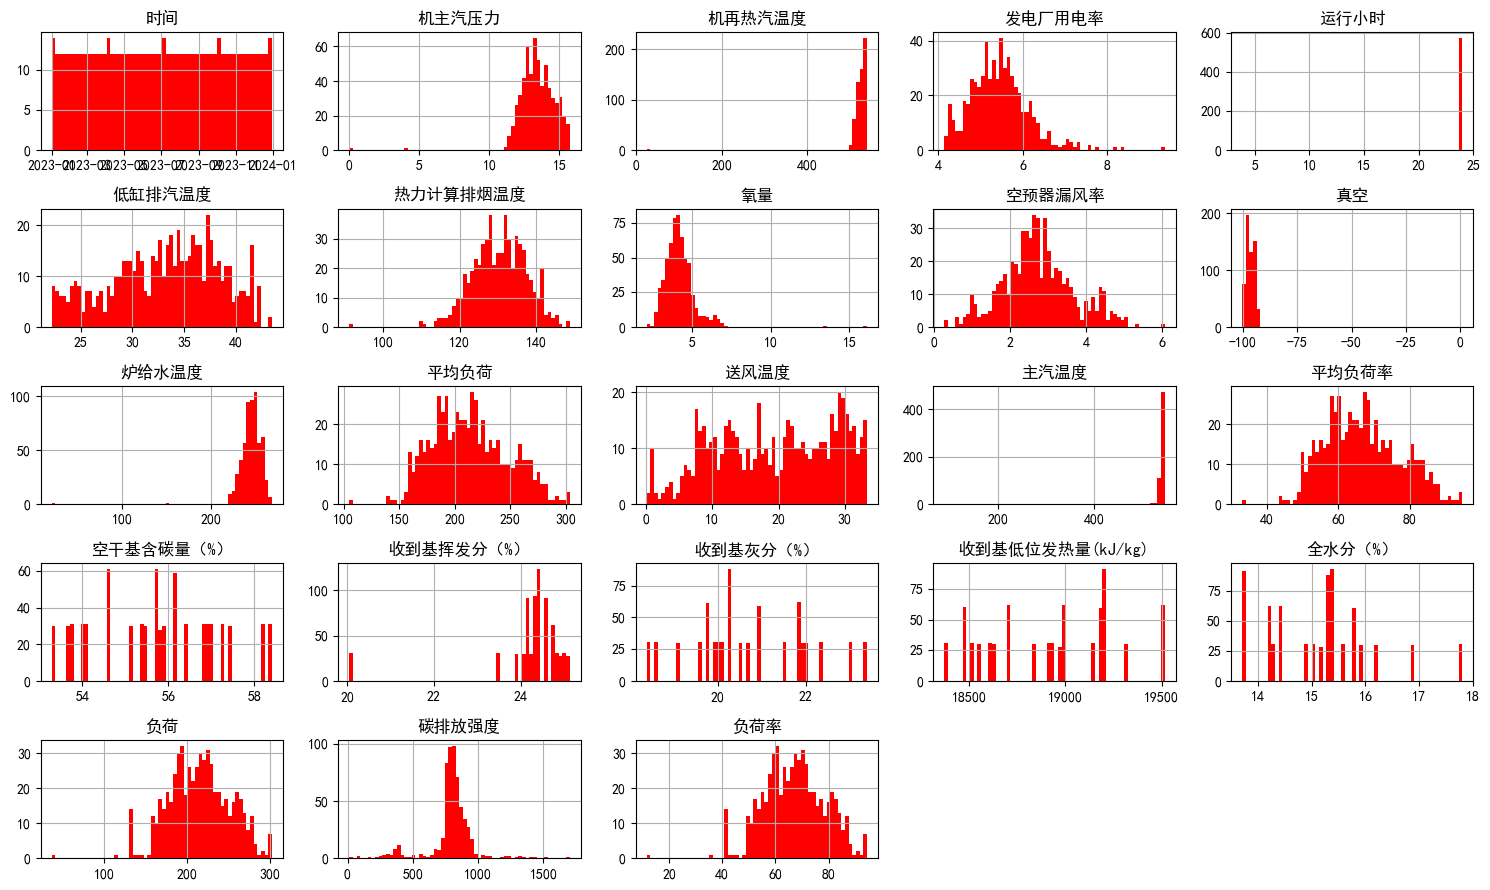

In [39]:
df12.hist(bins=60, figsize=(15,9),color="red");plt.tight_layout();plt.show()

## 缺失值处理

### 填充缺失值（待定）

In [53]:
# # 对 DataFrame 中的所有列使用插值法填充缺失值
# df_interpolated = df12.interpolate(method='linear', axis=0)

# # 检查填充后的缺失数据
# print(df_interpolated.isnull().sum())


In [41]:
# df_interpolated

,时间,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,主汽温度,平均负荷率,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,碳排放强度,负荷率
0,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
1,2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
2,2023-01-03,15.65,533.63,5.19,8.86,41.57,NaN,4.81,4.41,-93.92,...,537.59,44.443750,54.08,24.33,23.39,18369.7,14.2,141.087714,1062.949749,44.089911
3,2023-01-04,12.30,512.90,4.92,24.00,26.85,119.69,4.39,2.40,-99.81,...,540.04,64.584375,54.08,24.33,23.39,18369.7,14.2,206.725734,838.917627,64.601792
4,2023-01-05,13.71,515.22,4.63,24.00,28.49,123.48,4.05,3.02,-99.43,...,539.85,72.006250,54.08,24.33,23.39,18369.7,14.2,230.600729,863.165329,72.062728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27,12.65,532.27,5.20,24.00,24.84,124.63,4.75,1.62,-99.40,...,539.96,59.715625,58.23,24.76,18.39,19516.3,15.0,191.657544,794.340575,59.892982
726,2023-12-28,13.19,536.40,4.63,24.00,26.57,127.44,4.29,1.57,-99.07,...,541.37,67.156250,58.23,24.76,18.39,19516.3,15.0,219.844826,774.897876,68.701508
727,2023-12-29,14.60,537.31,4.65,24.00,30.17,130.94,3.21,1.58,-98.35,...,541.64,84.115625,58.23,24.76,18.39,19516.3,15.0,274.055629,744.289131,85.642384
728,2023-12-30,12.37,533.23,5.42,24.00,24.91,120.49,4.87,1.52,-99.34,...,539.70,57.681250,58.23,24.76,18.39,19516.3,15.0,183.665231,805.372623,57.395385


### 删除缺失值

In [57]:
df12[df12["平均负荷"].isnull()]

,时间,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,主汽温度,平均负荷率,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,碳排放强度,负荷率
0,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
1,2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
20,2023-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
21,2023-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
22,2023-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,2023-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.65,24.08,20.66,18474.0,16.9,NaN,NaN,NaN
630,2023-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.65,24.08,20.66,18474.0,16.9,NaN,NaN,NaN
631,2023-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.65,24.08,20.66,18474.0,16.9,NaN,NaN,NaN
632,2023-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.65,24.08,20.66,18474.0,16.9,NaN,NaN,NaN


In [5]:
# 删除缺失值 
df_without_NaN = df12.dropna()
df_without_NaN

,时间,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,主汽温度,平均负荷率,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,碳排放强度,负荷率
3,2023-01-04,12.30,512.90,4.92,24.0,26.85,119.69,4.39,2.40,-99.81,...,540.04,64.584375,54.08,24.33,23.39,18369.7,14.2,206.725734,838.917627,64.601792
4,2023-01-05,13.71,515.22,4.63,24.0,28.49,123.48,4.05,3.02,-99.43,...,539.85,72.006250,54.08,24.33,23.39,18369.7,14.2,230.600729,863.165329,72.062728
5,2023-01-06,11.87,504.59,5.50,24.0,24.80,122.51,5.13,3.36,-100.23,...,542.23,53.384375,54.08,24.33,23.39,18369.7,14.2,171.070951,902.415743,53.459672
6,2023-01-07,11.52,504.14,5.56,24.0,24.42,125.56,5.11,2.58,-100.32,...,543.10,51.562500,54.08,24.33,23.39,18369.7,14.2,164.837187,896.849022,51.511621
7,2023-01-08,11.39,505.97,7.03,24.0,24.59,127.30,5.31,2.71,-100.29,...,541.95,50.912500,54.08,24.33,23.39,18369.7,14.2,163.191714,906.832620,50.997411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27,12.65,532.27,5.20,24.0,24.84,124.63,4.75,1.62,-99.40,...,539.96,59.715625,58.23,24.76,18.39,19516.3,15.0,191.657544,794.340575,59.892982
726,2023-12-28,13.19,536.40,4.63,24.0,26.57,127.44,4.29,1.57,-99.07,...,541.37,67.156250,58.23,24.76,18.39,19516.3,15.0,219.844826,774.897876,68.701508
727,2023-12-29,14.60,537.31,4.65,24.0,30.17,130.94,3.21,1.58,-98.35,...,541.64,84.115625,58.23,24.76,18.39,19516.3,15.0,274.055629,744.289131,85.642384
728,2023-12-30,12.37,533.23,5.42,24.0,24.91,120.49,4.87,1.52,-99.34,...,539.70,57.681250,58.23,24.76,18.39,19516.3,15.0,183.665231,805.372623,57.395385


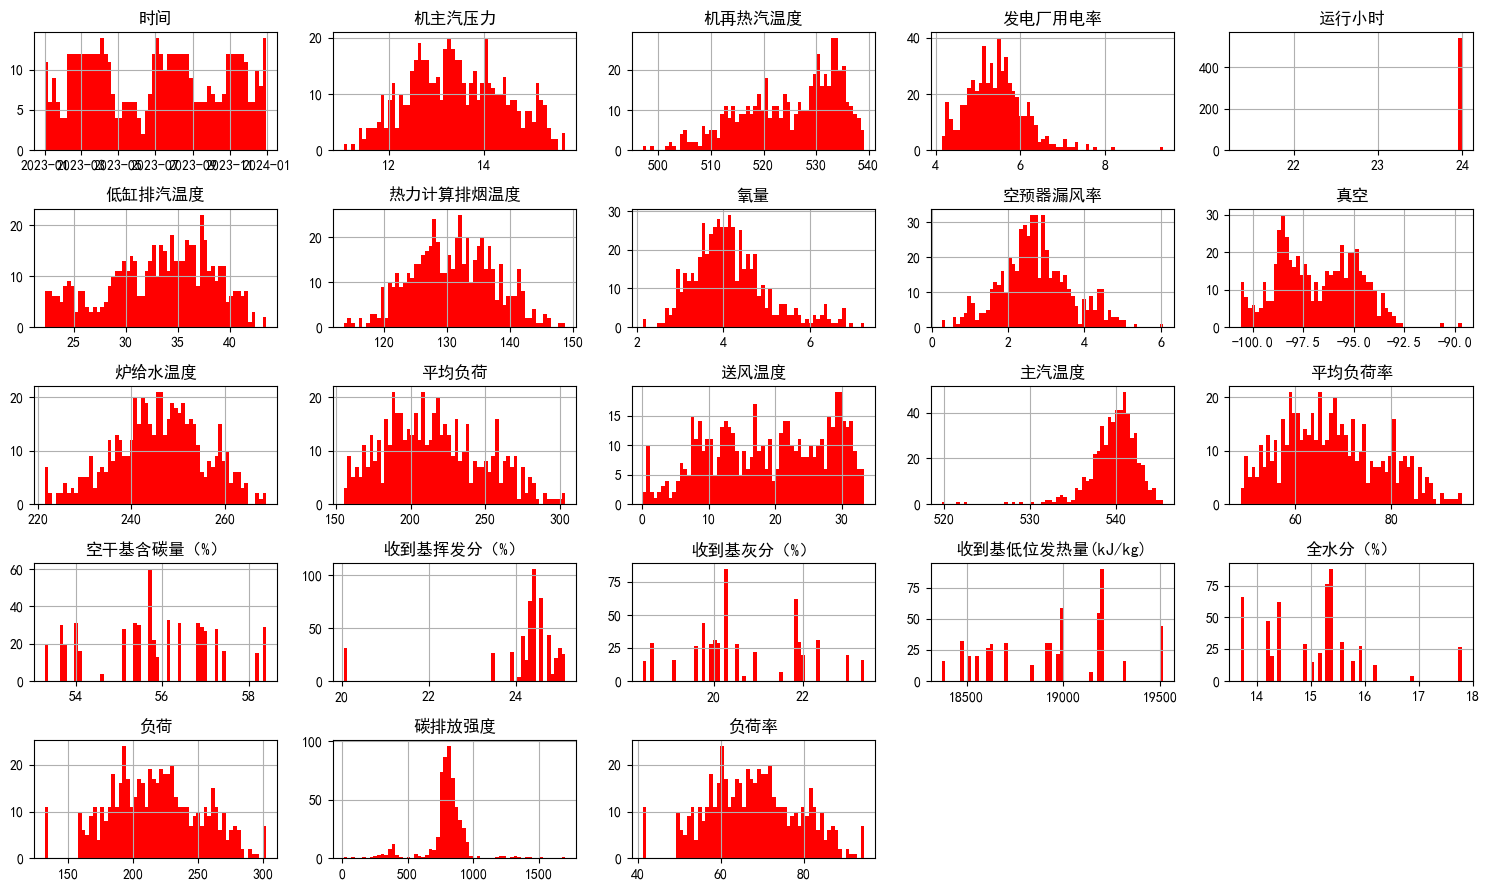

In [59]:
df_without_NaN.hist(bins=60, figsize=(15,9),color="red");plt.tight_layout();plt.show()

## 异常值处理

In [60]:
df_without_NaN

,时间,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,主汽温度,平均负荷率,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,碳排放强度,负荷率
3,2023-01-04,12.30,512.90,4.92,24.0,26.85,119.69,4.39,2.40,-99.81,...,540.04,64.584375,54.08,24.33,23.39,18369.7,14.2,206.725734,838.917627,64.601792
4,2023-01-05,13.71,515.22,4.63,24.0,28.49,123.48,4.05,3.02,-99.43,...,539.85,72.006250,54.08,24.33,23.39,18369.7,14.2,230.600729,863.165329,72.062728
5,2023-01-06,11.87,504.59,5.50,24.0,24.80,122.51,5.13,3.36,-100.23,...,542.23,53.384375,54.08,24.33,23.39,18369.7,14.2,171.070951,902.415743,53.459672
6,2023-01-07,11.52,504.14,5.56,24.0,24.42,125.56,5.11,2.58,-100.32,...,543.10,51.562500,54.08,24.33,23.39,18369.7,14.2,164.837187,896.849022,51.511621
7,2023-01-08,11.39,505.97,7.03,24.0,24.59,127.30,5.31,2.71,-100.29,...,541.95,50.912500,54.08,24.33,23.39,18369.7,14.2,163.191714,906.832620,50.997411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27,12.65,532.27,5.20,24.0,24.84,124.63,4.75,1.62,-99.40,...,539.96,59.715625,58.23,24.76,18.39,19516.3,15.0,191.657544,794.340575,59.892982
726,2023-12-28,13.19,536.40,4.63,24.0,26.57,127.44,4.29,1.57,-99.07,...,541.37,67.156250,58.23,24.76,18.39,19516.3,15.0,219.844826,774.897876,68.701508
727,2023-12-29,14.60,537.31,4.65,24.0,30.17,130.94,3.21,1.58,-98.35,...,541.64,84.115625,58.23,24.76,18.39,19516.3,15.0,274.055629,744.289131,85.642384
728,2023-12-30,12.37,533.23,5.42,24.0,24.91,120.49,4.87,1.52,-99.34,...,539.70,57.681250,58.23,24.76,18.39,19516.3,15.0,183.665231,805.372623,57.395385


In [61]:
df_without_NaN.columns

Index(['时间', '机主汽压力', '机再热汽温度', '发电厂用电率', '运行小时', '低缸排汽温度', '热力计算排烟温度', '氧量',
       '空预器漏风率', '真空', '炉给水温度', '平均负荷', '送风温度', '主汽温度', '平均负荷率', '空干基含碳量（%）',
       '收到基挥发分（%）', '收到基灰分（%）', '收到基低位发热量(kJ/kg)', '全水分（%）', '负荷', '碳排放强度',
       '负荷率'],
      dtype='object')

In [62]:
def remove_outlier(df,columns):
    # 1st quartile (25%)
    Q1 = np.percentile(df[columns], 25)
    # 3rd quartile (75%)
    Q3 = np.percentile(df[columns],75)
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    # outlier step
    outlier_step = 1.5 * IQR
    df_out = df[(df[columns]>=Q1-outlier_step) & (df[columns]<=Q3+outlier_step)]
    return df_out

In [63]:
df_out = remove_outlier(df_without_NaN,'碳排放强度')
df_out

,时间,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,主汽温度,平均负荷率,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,碳排放强度,负荷率
3,2023-01-04,12.30,512.90,4.92,24.0,26.85,119.69,4.39,2.40,-99.81,...,540.04,64.584375,54.08,24.33,23.39,18369.7,14.2,206.725734,838.917627,64.601792
4,2023-01-05,13.71,515.22,4.63,24.0,28.49,123.48,4.05,3.02,-99.43,...,539.85,72.006250,54.08,24.33,23.39,18369.7,14.2,230.600729,863.165329,72.062728
5,2023-01-06,11.87,504.59,5.50,24.0,24.80,122.51,5.13,3.36,-100.23,...,542.23,53.384375,54.08,24.33,23.39,18369.7,14.2,171.070951,902.415743,53.459672
6,2023-01-07,11.52,504.14,5.56,24.0,24.42,125.56,5.11,2.58,-100.32,...,543.10,51.562500,54.08,24.33,23.39,18369.7,14.2,164.837187,896.849022,51.511621
7,2023-01-08,11.39,505.97,7.03,24.0,24.59,127.30,5.31,2.71,-100.29,...,541.95,50.912500,54.08,24.33,23.39,18369.7,14.2,163.191714,906.832620,50.997411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27,12.65,532.27,5.20,24.0,24.84,124.63,4.75,1.62,-99.40,...,539.96,59.715625,58.23,24.76,18.39,19516.3,15.0,191.657544,794.340575,59.892982
726,2023-12-28,13.19,536.40,4.63,24.0,26.57,127.44,4.29,1.57,-99.07,...,541.37,67.156250,58.23,24.76,18.39,19516.3,15.0,219.844826,774.897876,68.701508
727,2023-12-29,14.60,537.31,4.65,24.0,30.17,130.94,3.21,1.58,-98.35,...,541.64,84.115625,58.23,24.76,18.39,19516.3,15.0,274.055629,744.289131,85.642384
728,2023-12-30,12.37,533.23,5.42,24.0,24.91,120.49,4.87,1.52,-99.34,...,539.70,57.681250,58.23,24.76,18.39,19516.3,15.0,183.665231,805.372623,57.395385


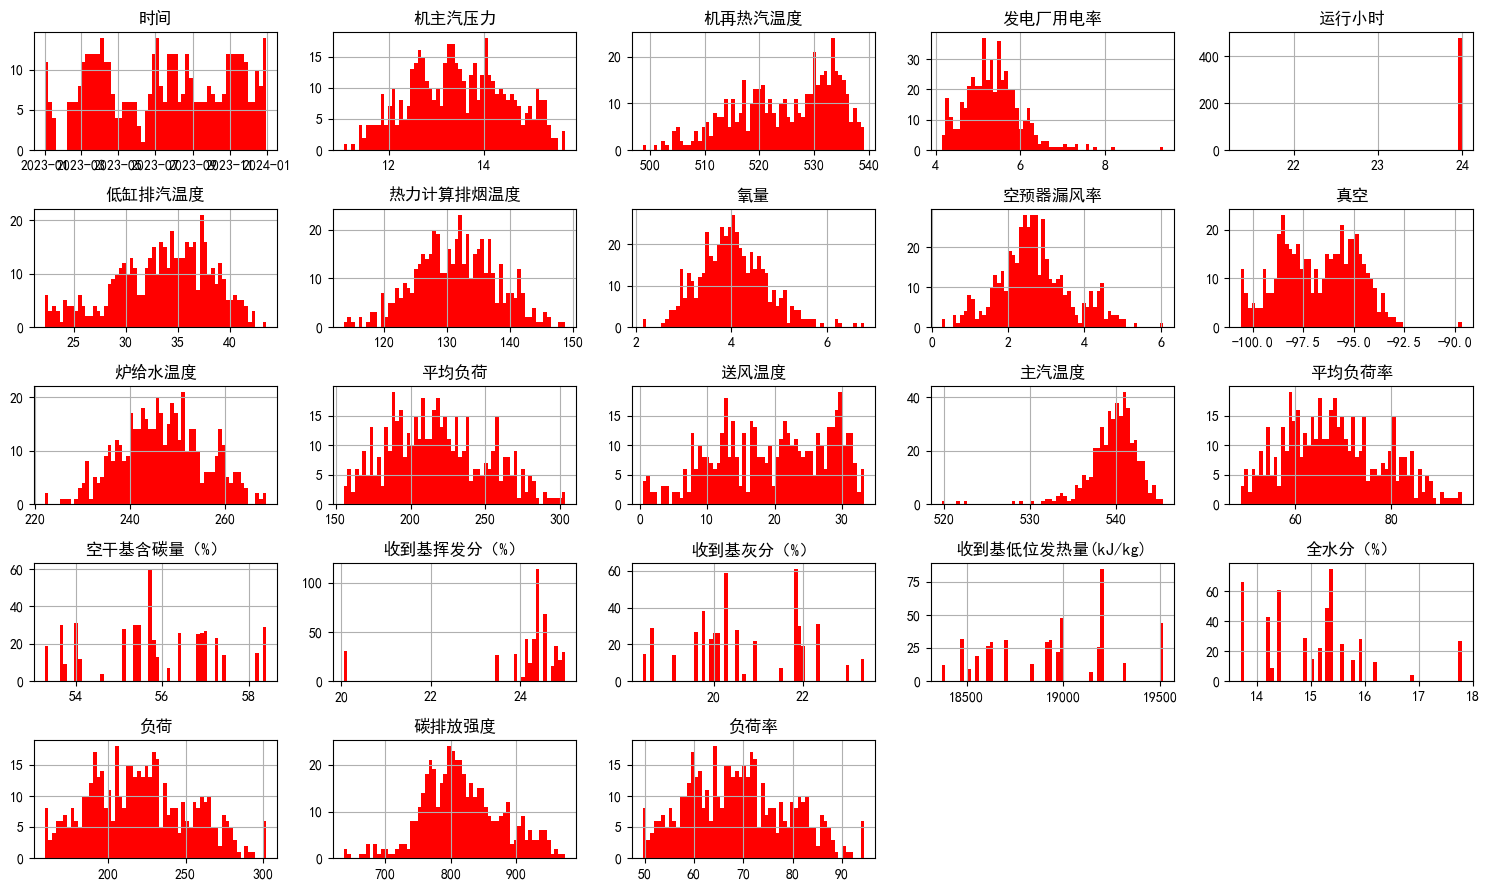

In [64]:
df_out.hist(bins=60, figsize=(15,9),color="red");plt.tight_layout();plt.show()

In [66]:
df_out.to_excel("../已清洗数据（空值异常值处理）/安庆12号清洗2023.xlsx", index = False)

# 1234机组

In [67]:
df1234 = pd.read_excel("../已整合数据/安庆1234号数据整合2023.xlsx")
df1234.replace(0, np.nan, inplace=True)
df1234

,时间,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,主汽温度,平均负荷率,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,碳排放强度,负荷率
0,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
1,2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
2,2023-01-03,15.65,533.63,5.19,8.86,41.57,NaN,4.81,4.41,-93.92,...,537.59,44.443750,54.08,24.33,23.39,18369.7,14.2,141.087714,1062.949749,44.089911
3,2023-01-04,12.30,512.90,4.92,24.00,26.85,119.69,4.39,2.40,-99.81,...,540.04,64.584375,54.08,24.33,23.39,18369.7,14.2,206.725734,838.917627,64.601792
4,2023-01-05,13.71,515.22,4.63,24.00,28.49,123.48,4.05,3.02,-99.43,...,539.85,72.006250,54.08,24.33,23.39,18369.7,14.2,230.600729,863.165329,72.062728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2023-12-27,26.12,613.64,NaN,24.00,30.09,113.35,4.15,8.13,-97.92,...,599.32,88.152000,59.63,24.76,14.96,20194.1,17.1,885.236197,788.513341,88.523620
1456,2023-12-28,27.83,611.98,NaN,24.00,30.95,114.66,3.88,8.26,-97.67,...,599.64,94.368000,59.63,24.76,14.96,20194.1,17.1,953.093993,776.642777,95.309399
1457,2023-12-29,28.02,614.26,NaN,24.00,31.36,114.24,3.81,7.48,-97.53,...,598.78,95.338000,59.63,24.76,14.96,20194.1,17.1,962.928834,772.054221,96.292883
1458,2023-12-30,25.09,614.70,NaN,24.00,30.68,112.40,4.37,7.89,-97.85,...,599.63,84.221000,59.63,24.76,14.96,20194.1,17.1,850.992135,799.697391,85.099214


In [68]:
# 查看数据的基本信息
print(df1234.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   时间               1460 non-null   datetime64[ns]
 1   机主汽压力            1252 non-null   float64       
 2   机再热汽温度           1254 non-null   float64       
 3   发电厂用电率           933 non-null    float64       
 4   运行小时             1251 non-null   float64       
 5   低缸排汽温度           1252 non-null   float64       
 6   热力计算排烟温度         1237 non-null   float64       
 7   氧量               1253 non-null   float64       
 8   空预器漏风率           1136 non-null   float64       
 9   真空               1252 non-null   float64       
 10  炉给水温度            1253 non-null   float64       
 11  平均负荷             1251 non-null   float64       
 12  送风温度             1244 non-null   float64       
 13  主汽温度             1252 non-null   float64       
 14  平均负荷率            1251 non-null   float64

In [69]:
# 查看是否存在缺失值
print(df1234.isnull().sum())

时间                   0
机主汽压力              208
机再热汽温度             206
发电厂用电率             527
运行小时               209
低缸排汽温度             208
热力计算排烟温度           223
氧量                 207
空预器漏风率             324
真空                 208
炉给水温度              207
平均负荷               209
送风温度               216
主汽温度               208
平均负荷率              209
空干基含碳量（%）            0
收到基挥发分（%）            0
收到基灰分（%）             0
收到基低位发热量(kJ/kg)      0
全水分（%）               0
负荷                 261
碳排放强度              261
负荷率                261
dtype: int64


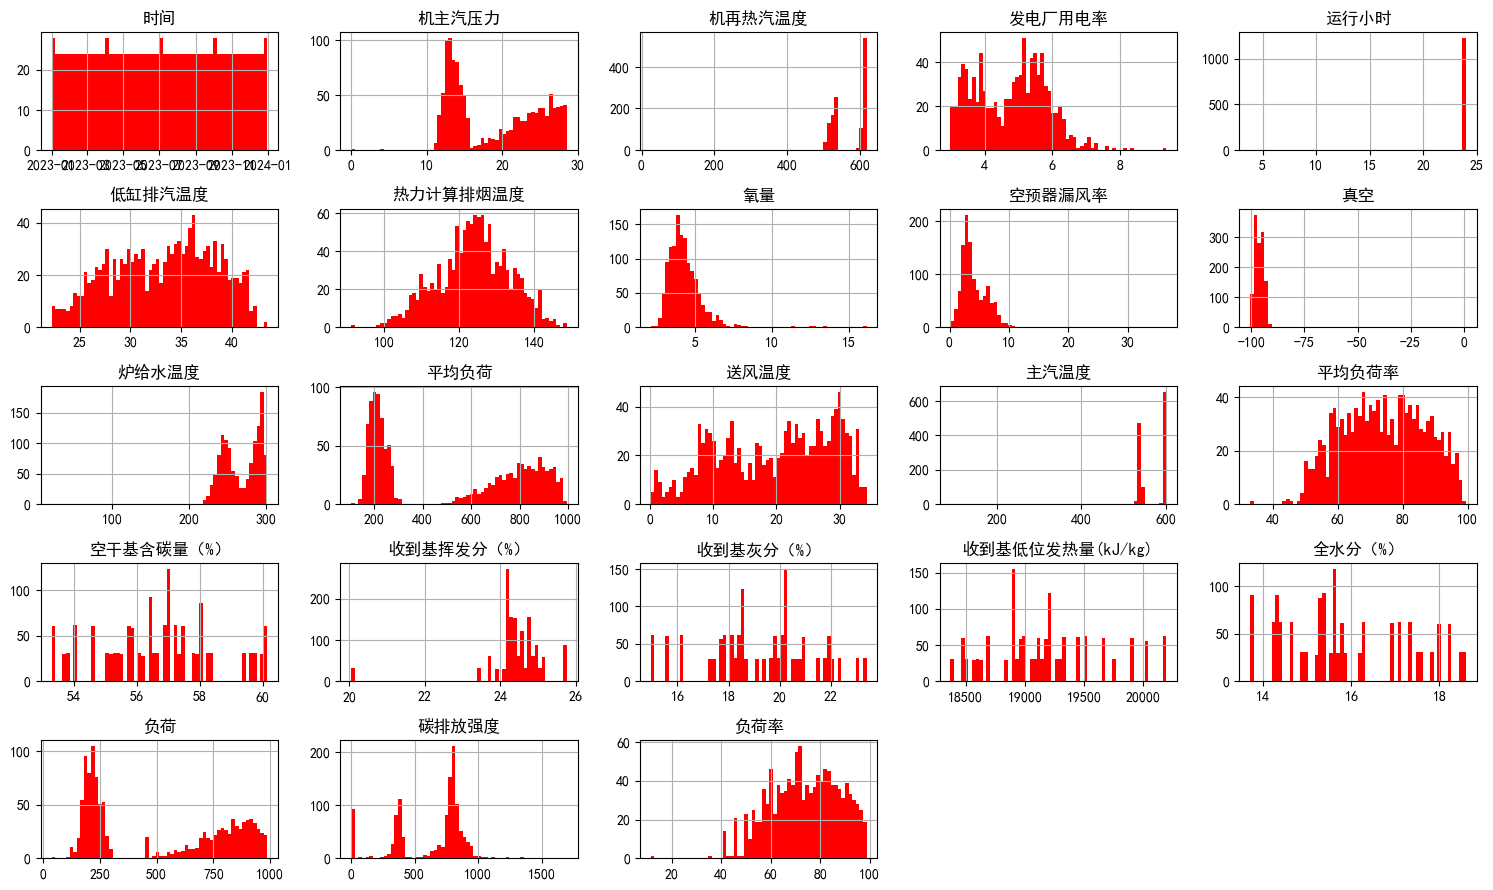

In [70]:
df1234.hist(bins=60, figsize=(15,9),color="red");plt.tight_layout();plt.show()

## 缺失值处理

### 填充缺失值（待定）

In [53]:
# # 对 DataFrame 中的所有列使用插值法填充缺失值
# df_interpolated = df12.interpolate(method='linear', axis=0)

# # 检查填充后的缺失数据
# print(df_interpolated.isnull().sum())


In [41]:
# df_interpolated

,时间,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,主汽温度,平均负荷率,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,碳排放强度,负荷率
0,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
1,2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
2,2023-01-03,15.65,533.63,5.19,8.86,41.57,NaN,4.81,4.41,-93.92,...,537.59,44.443750,54.08,24.33,23.39,18369.7,14.2,141.087714,1062.949749,44.089911
3,2023-01-04,12.30,512.90,4.92,24.00,26.85,119.69,4.39,2.40,-99.81,...,540.04,64.584375,54.08,24.33,23.39,18369.7,14.2,206.725734,838.917627,64.601792
4,2023-01-05,13.71,515.22,4.63,24.00,28.49,123.48,4.05,3.02,-99.43,...,539.85,72.006250,54.08,24.33,23.39,18369.7,14.2,230.600729,863.165329,72.062728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27,12.65,532.27,5.20,24.00,24.84,124.63,4.75,1.62,-99.40,...,539.96,59.715625,58.23,24.76,18.39,19516.3,15.0,191.657544,794.340575,59.892982
726,2023-12-28,13.19,536.40,4.63,24.00,26.57,127.44,4.29,1.57,-99.07,...,541.37,67.156250,58.23,24.76,18.39,19516.3,15.0,219.844826,774.897876,68.701508
727,2023-12-29,14.60,537.31,4.65,24.00,30.17,130.94,3.21,1.58,-98.35,...,541.64,84.115625,58.23,24.76,18.39,19516.3,15.0,274.055629,744.289131,85.642384
728,2023-12-30,12.37,533.23,5.42,24.00,24.91,120.49,4.87,1.52,-99.34,...,539.70,57.681250,58.23,24.76,18.39,19516.3,15.0,183.665231,805.372623,57.395385


### 删除缺失值

In [72]:
df1234[df1234["平均负荷"].isnull()]

,时间,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,主汽温度,平均负荷率,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,碳排放强度,负荷率
0,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
1,2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
20,2023-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
21,2023-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
22,2023-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,54.08,24.33,23.39,18369.7,14.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,2023-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,56.39,24.55,19.45,19446.5,15.7,NaN,NaN,NaN
1197,2023-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,56.39,24.55,19.45,19446.5,15.7,NaN,NaN,NaN
1198,2023-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,56.39,24.55,19.45,19446.5,15.7,NaN,NaN,NaN
1199,2023-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,56.39,24.55,19.45,19446.5,15.7,NaN,NaN,NaN


In [73]:
# 删除缺失值 
df1234_without_NaN = df1234.dropna()
df1234_without_NaN

,时间,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,主汽温度,平均负荷率,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,碳排放强度,负荷率
3,2023-01-04,12.30,512.90,4.92,24.0,26.85,119.69,4.39,2.40,-99.81,...,540.04,64.584375,54.08,24.33,23.39,18369.7,14.2,206.725734,838.917627,64.601792
4,2023-01-05,13.71,515.22,4.63,24.0,28.49,123.48,4.05,3.02,-99.43,...,539.85,72.006250,54.08,24.33,23.39,18369.7,14.2,230.600729,863.165329,72.062728
5,2023-01-06,11.87,504.59,5.50,24.0,24.80,122.51,5.13,3.36,-100.23,...,542.23,53.384375,54.08,24.33,23.39,18369.7,14.2,171.070951,902.415743,53.459672
6,2023-01-07,11.52,504.14,5.56,24.0,24.42,125.56,5.11,2.58,-100.32,...,543.10,51.562500,54.08,24.33,23.39,18369.7,14.2,164.837187,896.849022,51.511621
7,2023-01-08,11.39,505.97,7.03,24.0,24.59,127.30,5.31,2.71,-100.29,...,541.95,50.912500,54.08,24.33,23.39,18369.7,14.2,163.191714,906.832620,50.997411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,26.18,615.19,3.12,24.0,29.73,113.95,3.64,7.05,-97.82,...,598.08,86.646000,60.14,24.76,14.96,20186.4,17.1,869.711250,371.593445,86.971125
1091,2023-12-28,27.96,614.45,3.02,24.0,30.43,115.83,3.05,6.29,-97.56,...,598.39,93.812000,60.14,24.76,14.96,20186.4,17.1,945.729028,360.841710,94.572903
1092,2023-12-29,28.11,613.35,3.04,24.0,31.00,116.15,3.11,5.77,-96.99,...,597.71,94.750000,60.14,24.76,14.96,20186.4,17.1,958.533007,365.821446,95.853301
1093,2023-12-30,25.56,614.34,3.12,24.0,31.05,115.04,3.45,6.52,-96.55,...,598.61,84.083000,60.14,24.76,14.96,20186.4,17.1,854.976303,355.232213,85.497630


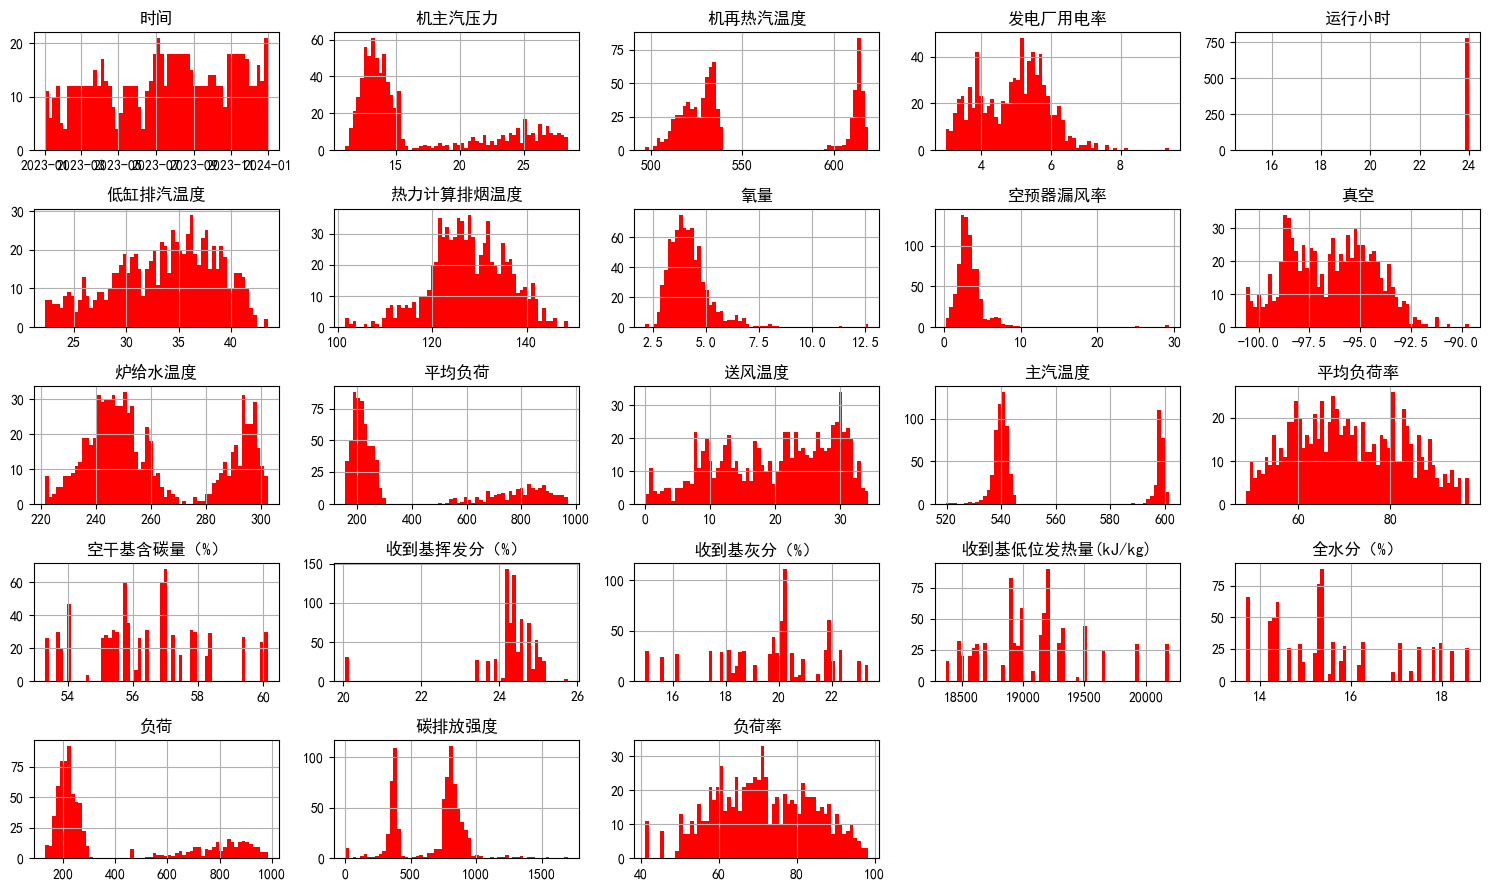

In [74]:
df1234_without_NaN.hist(bins=60, figsize=(15,9),color="red");plt.tight_layout();plt.show()

## 异常值处理

In [75]:
df1234_without_NaN

,时间,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,主汽温度,平均负荷率,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,碳排放强度,负荷率
3,2023-01-04,12.30,512.90,4.92,24.0,26.85,119.69,4.39,2.40,-99.81,...,540.04,64.584375,54.08,24.33,23.39,18369.7,14.2,206.725734,838.917627,64.601792
4,2023-01-05,13.71,515.22,4.63,24.0,28.49,123.48,4.05,3.02,-99.43,...,539.85,72.006250,54.08,24.33,23.39,18369.7,14.2,230.600729,863.165329,72.062728
5,2023-01-06,11.87,504.59,5.50,24.0,24.80,122.51,5.13,3.36,-100.23,...,542.23,53.384375,54.08,24.33,23.39,18369.7,14.2,171.070951,902.415743,53.459672
6,2023-01-07,11.52,504.14,5.56,24.0,24.42,125.56,5.11,2.58,-100.32,...,543.10,51.562500,54.08,24.33,23.39,18369.7,14.2,164.837187,896.849022,51.511621
7,2023-01-08,11.39,505.97,7.03,24.0,24.59,127.30,5.31,2.71,-100.29,...,541.95,50.912500,54.08,24.33,23.39,18369.7,14.2,163.191714,906.832620,50.997411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,26.18,615.19,3.12,24.0,29.73,113.95,3.64,7.05,-97.82,...,598.08,86.646000,60.14,24.76,14.96,20186.4,17.1,869.711250,371.593445,86.971125
1091,2023-12-28,27.96,614.45,3.02,24.0,30.43,115.83,3.05,6.29,-97.56,...,598.39,93.812000,60.14,24.76,14.96,20186.4,17.1,945.729028,360.841710,94.572903
1092,2023-12-29,28.11,613.35,3.04,24.0,31.00,116.15,3.11,5.77,-96.99,...,597.71,94.750000,60.14,24.76,14.96,20186.4,17.1,958.533007,365.821446,95.853301
1093,2023-12-30,25.56,614.34,3.12,24.0,31.05,115.04,3.45,6.52,-96.55,...,598.61,84.083000,60.14,24.76,14.96,20186.4,17.1,854.976303,355.232213,85.497630


In [76]:
df1234_without_NaN.columns

Index(['时间', '机主汽压力', '机再热汽温度', '发电厂用电率', '运行小时', '低缸排汽温度', '热力计算排烟温度', '氧量',
       '空预器漏风率', '真空', '炉给水温度', '平均负荷', '送风温度', '主汽温度', '平均负荷率', '空干基含碳量（%）',
       '收到基挥发分（%）', '收到基灰分（%）', '收到基低位发热量(kJ/kg)', '全水分（%）', '负荷', '碳排放强度',
       '负荷率'],
      dtype='object')

In [77]:
df1234_out = remove_outlier(df1234_without_NaN,'碳排放强度')
df1234_out

,时间,机主汽压力,机再热汽温度,发电厂用电率,运行小时,低缸排汽温度,热力计算排烟温度,氧量,空预器漏风率,真空,...,主汽温度,平均负荷率,空干基含碳量（%）,收到基挥发分（%）,收到基灰分（%）,收到基低位发热量(kJ/kg),全水分（%）,负荷,碳排放强度,负荷率
3,2023-01-04,12.30,512.90,4.92,24.0,26.85,119.69,4.39,2.40,-99.81,...,540.04,64.584375,54.08,24.33,23.39,18369.7,14.2,206.725734,838.917627,64.601792
4,2023-01-05,13.71,515.22,4.63,24.0,28.49,123.48,4.05,3.02,-99.43,...,539.85,72.006250,54.08,24.33,23.39,18369.7,14.2,230.600729,863.165329,72.062728
5,2023-01-06,11.87,504.59,5.50,24.0,24.80,122.51,5.13,3.36,-100.23,...,542.23,53.384375,54.08,24.33,23.39,18369.7,14.2,171.070951,902.415743,53.459672
6,2023-01-07,11.52,504.14,5.56,24.0,24.42,125.56,5.11,2.58,-100.32,...,543.10,51.562500,54.08,24.33,23.39,18369.7,14.2,164.837187,896.849022,51.511621
7,2023-01-08,11.39,505.97,7.03,24.0,24.59,127.30,5.31,2.71,-100.29,...,541.95,50.912500,54.08,24.33,23.39,18369.7,14.2,163.191714,906.832620,50.997411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,26.18,615.19,3.12,24.0,29.73,113.95,3.64,7.05,-97.82,...,598.08,86.646000,60.14,24.76,14.96,20186.4,17.1,869.711250,371.593445,86.971125
1091,2023-12-28,27.96,614.45,3.02,24.0,30.43,115.83,3.05,6.29,-97.56,...,598.39,93.812000,60.14,24.76,14.96,20186.4,17.1,945.729028,360.841710,94.572903
1092,2023-12-29,28.11,613.35,3.04,24.0,31.00,116.15,3.11,5.77,-96.99,...,597.71,94.750000,60.14,24.76,14.96,20186.4,17.1,958.533007,365.821446,95.853301
1093,2023-12-30,25.56,614.34,3.12,24.0,31.05,115.04,3.45,6.52,-96.55,...,598.61,84.083000,60.14,24.76,14.96,20186.4,17.1,854.976303,355.232213,85.497630


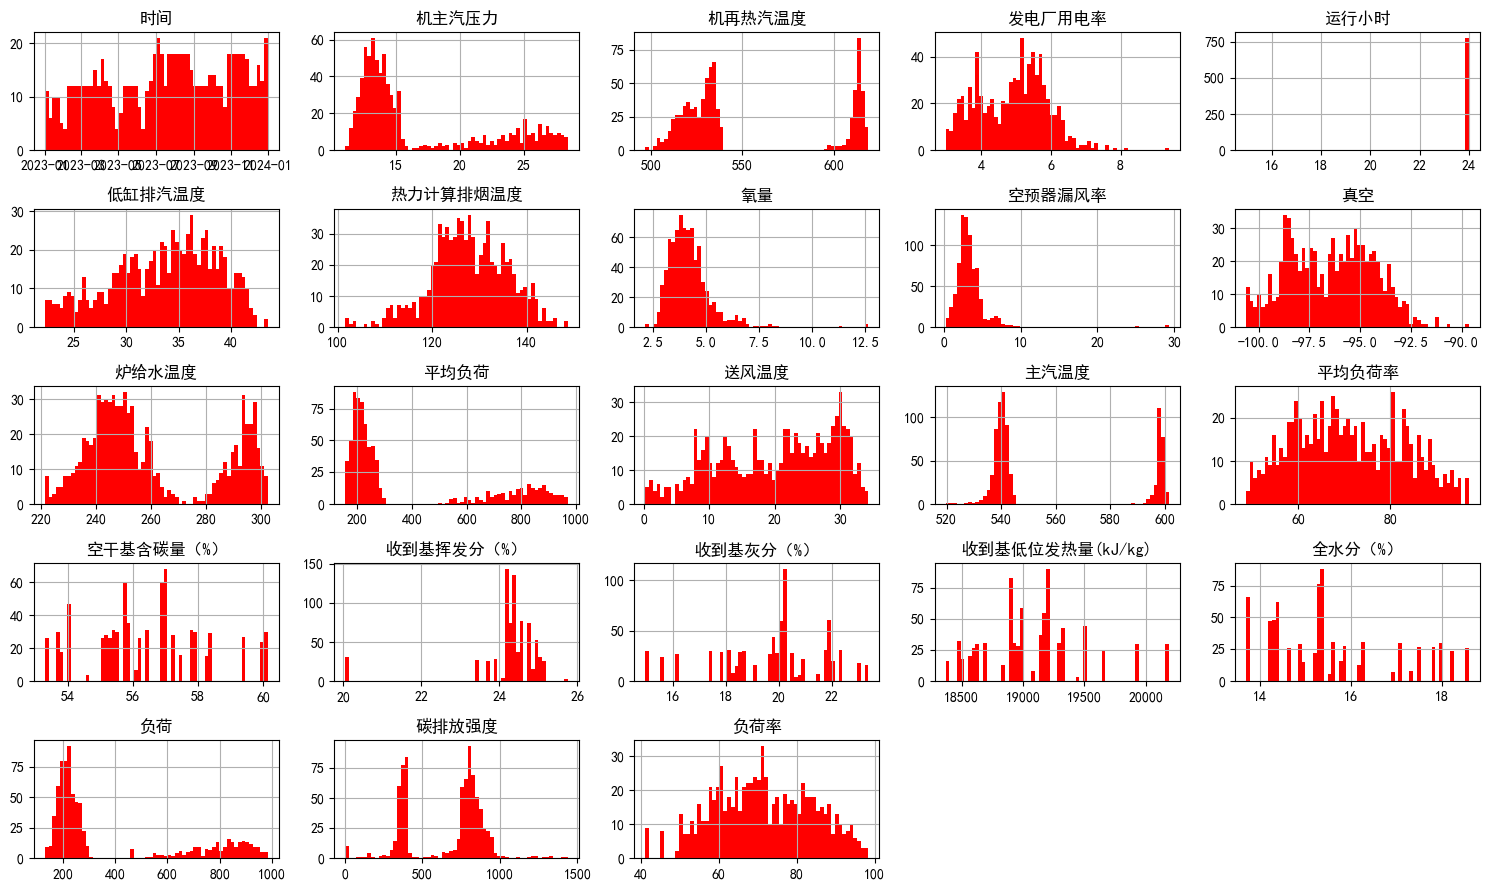

In [78]:
df1234_out.hist(bins=60, figsize=(15,9),color="red");plt.tight_layout();plt.show()

In [79]:
df1234_out.to_excel("../已清洗数据（空值异常值处理）/安庆1234号清洗2023.xlsx", index = False)

# 参考

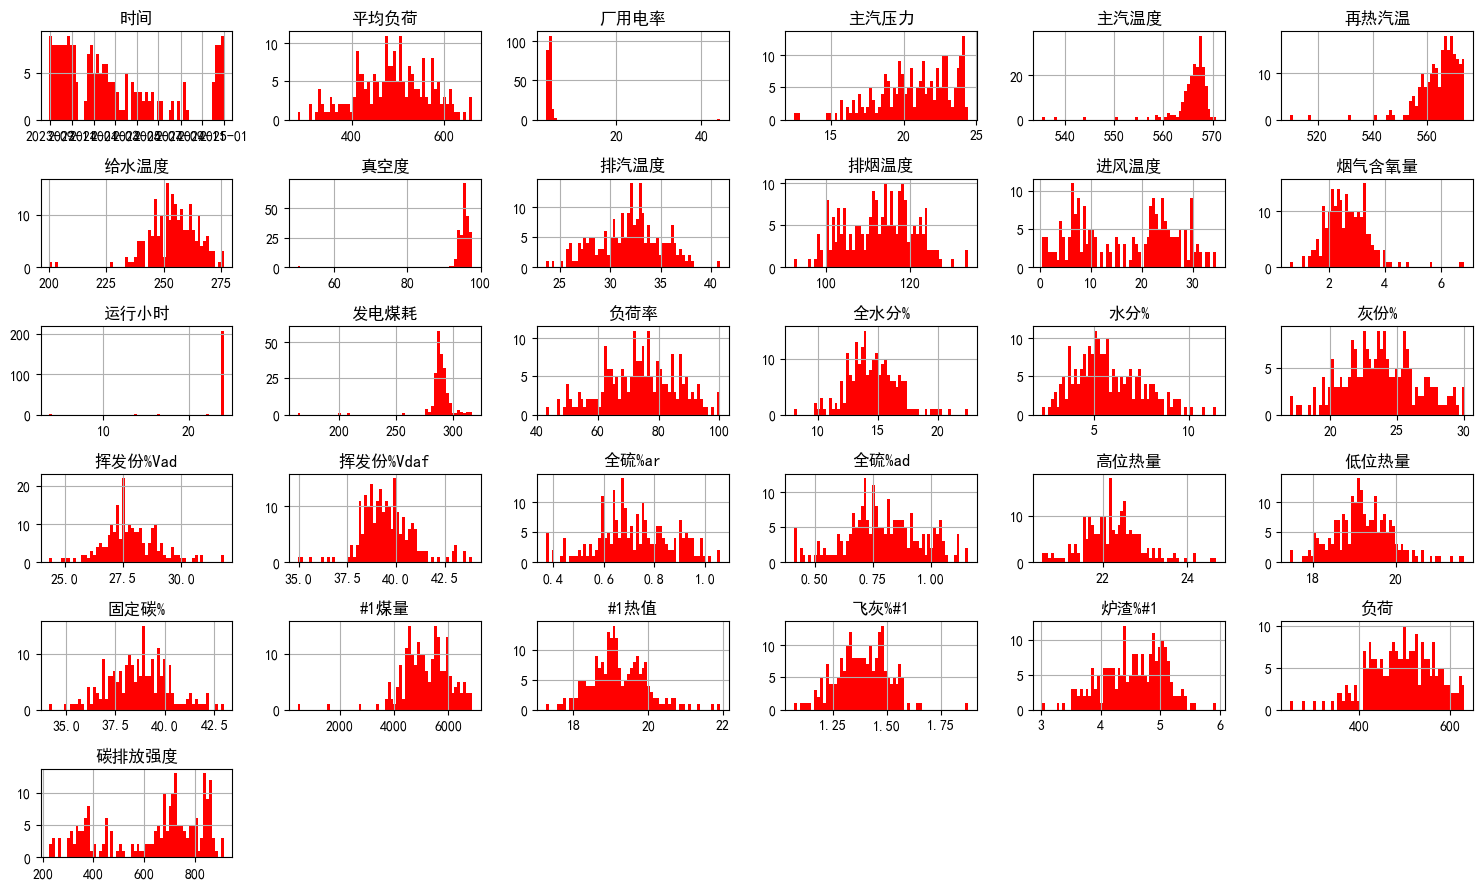

In [92]:
# Q1_ZaiReQiWen = np.percentile(cleaned_df["再热汽温"], 25)
# Q3_ZaiReQiWen = np.percentile(cleaned_df["再热汽温"],75)
# IQR_ZaiReQiWen = Q3_ZaiReQiWen - Q1_ZaiReQiWen
# outlier_step_ZaiReQiWen = 1.5 * IQR_ZaiReQiWen

# Q1_YangLiang = np.percentile(cleaned_df["烟气含氧量"], 25)
# Q3_YangLiang = np.percentile(cleaned_df["烟气含氧量"],75)
# IQR_YangLiang = Q3_YangLiang - Q1_YangLiang
# outlier_step_YangLiang = 1.5 * IQR_YangLiang

# Q1_PaiYanWenDu = np.percentile(cleaned_df["排烟温度"], 25)
# Q3_PaiYanWenDu = np.percentile(cleaned_df["排烟温度"],75)
# IQR_PaiYanWenDu = Q3_PaiYanWenDu - Q1_PaiYanWenDu
# outlier_step_PaiYanWenDu = 1.5 * IQR_PaiYanWenDu

# Q1_TanPaiFangQiangDu = np.percentile(cleaned_df["碳排放强度"], 25)
# Q3_TanPaiFangQiangDu = np.percentile(cleaned_df["碳排放强度"],75)
# IQR_TanPaiFangQiangDu = Q3_TanPaiFangQiangDu - Q1_TanPaiFangQiangDu
# outlier_step_TanPaiFangQiangDu = 1.5 * IQR_TanPaiFangQiangDu

# df_out_1 = cleaned_df[(cleaned_df["再热汽温"]>=Q1_ZaiReQiWen-outlier_step_ZaiReQiWen) & (cleaned_df["再热汽温"]<=Q3_ZaiReQiWen+outlier_step_ZaiReQiWen) &
#                 (cleaned_df["烟气含氧量"]>=Q1_YangLiang-outlier_step_YangLiang) & (cleaned_df["烟气含氧量"]<=Q3_YangLiang+outlier_step_YangLiang) &
#                 (cleaned_df["排烟温度"]>=Q1_PaiYanWenDu-outlier_step_PaiYanWenDu) & (cleaned_df["排烟温度"]<=Q3_PaiYanWenDu+outlier_step_PaiYanWenDu) & 
#                 (cleaned_df["碳排放强度"]>=Q1_TanPaiFangQiangDu-outlier_step_TanPaiFangQiangDu) & (cleaned_df["碳排放强度"]<=Q3_TanPaiFangQiangDu+outlier_step_TanPaiFangQiangDu) &
#                 (cleaned_df["平均负荷"]>200) & (cleaned_df["厂用电率"]<100) & (cleaned_df["主汽压力"]>10) & (cleaned_df["主汽温度"]>400) &
#                 (cleaned_df["排汽温度"]<500) & (cleaned_df["碳排放强度"]>200) & (cleaned_df['运行小时']>-1) & (cleaned_df['运行小时']<25) &(cleaned_df['进风温度']>0)  ]

# df_out_1.hist(bins=60, figsize=(15,9),color="red")
# plt.tight_layout()
# plt.show()